In [1]:
# Dependencies and Setup
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns


In [2]:
# Read Purchasing File and store into Pandas data frame
movie = pd.read_csv('../SMU_Project_Group_1/final_data.csv')

# Display first 10 rows
movie.head()

,Unnamed: 0,Colouring,Director,Critic Review Count,Duration,Director Facebook Likes,Actor 3 Facebook Likes,Actor 2,Actor 1 Facebook Likes,Gross,...,Tagline,Overview,Runtime,Production Companies,Release Date,Vote Count,Average Vote,Release Year,Adjusted Budget,Adjusted Revenue
0,3023,Color,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,...,How do I loathe thee? Let me count the ways.,"Bianca, a tenth grader, has never gone on a da...",97,Mad Chance|Jaret Entertainment|Touchstone Pict...,3/30/1999,947,7.2,1999,2.094485e+07,7.000575e+07
1,582,Color,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,...,Meet Two Unlikely Heroes With A Bone To Pick.,Get ready for a howling good time as an all ne...,100,Walt Disney Pictures|Cruella Productions,10/7/2000,150,5.0,2000,1.076348e+08,2.325061e+08
2,3482,Color,Robert Moresco,26.0,107.0,53.0,463.0,Brad Renfro,954.0,53481.0,...,"The Intersection Where Family, Honor and Betra...",A former street tough returns to his Philadelp...,107,Thinkfilm,2/19/2006,12,6.0,2006,8.653353e+06,1.551665e+05
3,3640,Color,Greg Marcks,68.0,85.0,9.0,407.0,Barbara Hershey,861.0,NaN,...,Fate can change in seconds.,Tells the seemingly random yet vitally connect...,86,Firm Films|Media 8 Entertainment|MDP Worldwide,5/16/2003,113,6.7,2003,7.112116e+06,0.000000e+00
4,4235,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359.0,NaN,...,NaN,During the trial of a man accused of his fathe...,117,MGM Television,8/17/1997,37,7.5,1997,0.000000e+00,0.000000e+00


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 44 columns):
Unnamed: 0                 3649 non-null int64
Colouring                  3642 non-null object
Director                   3649 non-null object
Critic Review Count        3648 non-null float64
Duration                   3649 non-null float64
Director Facebook Likes    3649 non-null float64
Actor 3 Facebook Likes     3646 non-null float64
Actor 2                    3648 non-null object
Actor 1 Facebook Likes     3649 non-null float64
Gross                      3331 non-null float64
Genres                     3649 non-null object
Actor 1                    3649 non-null object
Title                      3649 non-null object
IMDb Votes                 3649 non-null int64
Cast Facebook Likes        3649 non-null int64
Actor 3                    3646 non-null object
Poster Facenumber          3644 non-null float64
Plot Keywords              3632 non-null object
IMDb Link                

In [4]:
# We are going to analuze only 1995 and 2015 data
movie = movie[movie['Release Year'] >= 1995]
movie = movie[movie['Release Year'] <= 2015]
movie

,Unnamed: 0,Colouring,Director,Critic Review Count,Duration,Director Facebook Likes,Actor 3 Facebook Likes,Actor 2,Actor 1 Facebook Likes,Gross,...,Tagline,Overview,Runtime,Production Companies,Release Date,Vote Count,Average Vote,Release Year,Adjusted Budget,Adjusted Revenue
0,3023,Color,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,...,How do I loathe thee? Let me count the ways.,"Bianca, a tenth grader, has never gone on a da...",97,Mad Chance|Jaret Entertainment|Touchstone Pict...,3/30/1999,947,7.2,1999,2.094485e+07,7.000575e+07
1,582,Color,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,...,Meet Two Unlikely Heroes With A Bone To Pick.,Get ready for a howling good time as an all ne...,100,Walt Disney Pictures|Cruella Productions,10/7/2000,150,5.0,2000,1.076348e+08,2.325061e+08
2,3482,Color,Robert Moresco,26.0,107.0,53.0,463.0,Brad Renfro,954.0,53481.0,...,"The Intersection Where Family, Honor and Betra...",A former street tough returns to his Philadelp...,107,Thinkfilm,2/19/2006,12,6.0,2006,8.653353e+06,1.551665e+05
3,3640,Color,Greg Marcks,68.0,85.0,9.0,407.0,Barbara Hershey,861.0,NaN,...,Fate can change in seconds.,Tells the seemingly random yet vitally connect...,86,Firm Films|Media 8 Entertainment|MDP Worldwide,5/16/2003,113,6.7,2003,7.112116e+06,0.000000e+00
4,4235,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359.0,NaN,...,NaN,During the trial of a man accused of his fathe...,117,MGM Television,8/17/1997,37,7.5,1997,0.000000e+00,0.000000e+00
5,2503,Color,Renny Harlin,113.0,108.0,212.0,347.0,Ashley Scott,969.0,12232937.0,...,Survive all 12,When New Orleans cop Danny Fisher prevents a b...,108,The Mark Gordon Company|Fox Atomic|20th Centur...,3/19/2009,130,5.9,2009,2.032801e+07,1.756373e+07
6,2401,Color,Steve McQueen,597.0,134.0,0.0,500.0,Scoot McNairy,2000.0,56667870.0,...,The extraordinary true story of Solomon Northup,"In the pre-Civil War United States, Solomon No...",134,Plan B Entertainment|Regency Enterprises|River...,10/18/2013,2241,7.9,2013,1.872067e+07,1.750382e+08
7,2633,Color,Danny Boyle,450.0,94.0,0.0,223.0,Treat Williams,11000.0,18329466.0,...,There is no force more powerful than the will ...,127 Hours is the true story of mountain climbe...,94,Fox Searchlight Pictures|Dune Entertainment|Da...,11/5/2010,1645,6.9,2010,1.800000e+07,3.569292e+07
8,2314,Color,Mikael H??fstr??m,314.0,114.0,101.0,23.0,Kim Thomson,129.0,71975611.0,...,The only demons in room 1408 are those within ...,A man who specializes in debunking paranormal ...,104,Dimension Films,7/12/2007,746,6.4,2007,2.629171e+07,9.957156e+07
9,1373,Color,John Herzfeld,151.0,120.0,17.0,808.0,Charlize Theron,22000.0,24375436.0,...,America Likes to Watch,When Eastern European criminals Oleg and Emil ...,120,New Line Cinema|Industry Entertainment|Tribeca...,3/1/2001,84,5.7,2001,7.388929e+07,6.940665e+07


C:\Users\Kyoo Ha Cha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kyoo Ha Cha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Kyoo Ha Cha\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


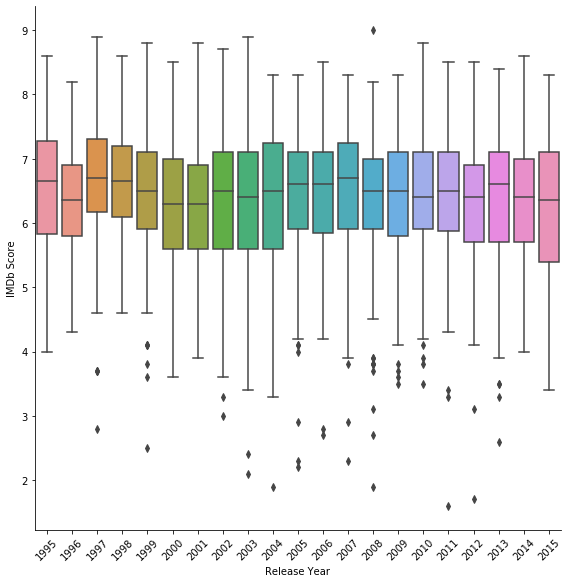

In [5]:
title_year_df = movie[['Release Year','IMDb Score']]

title_year_df['Release Year'] = title_year_df['Release Year'].astype(int)
sns.factorplot(y='IMDb Score',x='Release Year',data=title_year_df,kind='box', size=8)
plt.xticks(rotation=45)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Project_Group_1/IMDB_Score_YOY.png")

There are 126 movies with score greater or equal to 8
The highest score is 9.0


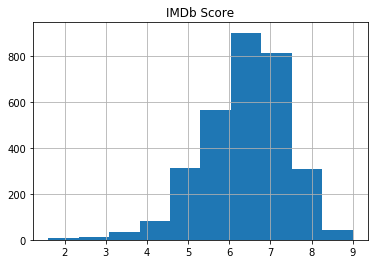

In [6]:
movie.hist(column='IMDb Score')
print(f"There are {len(movie[(movie['IMDb Score'] >= 8)])} movies with score greater or equal to 8")
print(f"The highest score is {movie['IMDb Score'].max()}")
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Project_Group_1/IMDB_Score_Distribution.png")
#IMDB score looks normal.
#And we can consider movies with a score greater or equal to 8 a great movie from many perspectives.

In [7]:
movie.isnull().sum()

Unnamed: 0                    0
Colouring                     7
Director                      0
Critic Review Count           1
Duration                      0
Director Facebook Likes       0
Actor 3 Facebook Likes        3
Actor 2                       1
Actor 1 Facebook Likes        0
Gross                       195
Genres                        0
Actor 1                       0
Title                         0
IMDb Votes                    0
Cast Facebook Likes           0
Actor 3                       3
Poster Facenumber             5
Plot Keywords                16
IMDb Link                     0
User Review Count             0
Language                      1
Country                       0
Countent Rating              31
Budget                      190
Actor 2 Facebook Likes        1
IMDb Score                    0
Aspect Ratio                 67
Facebook Likes                0
IMDb ID                       0
id                            0
Popularity                    0
Revenue 

In [8]:
# Return of investment
profits = []
roi_vals = []

for index, row in movie.iterrows():
    profit = row['Gross'] - row['Budget']
    budget = row['Budget']
    num = profit - budget
    den = budget
    # convert roi to percentage
    roi = (num / den) * 100
    
    profits.append(profit)
    roi_vals.append(roi)
    
movie['profit'] = profits
movie['roi'] = roi_vals

movie.head()

,Unnamed: 0,Colouring,Director,Critic Review Count,Duration,Director Facebook Likes,Actor 3 Facebook Likes,Actor 2,Actor 1 Facebook Likes,Gross,...,Runtime,Production Companies,Release Date,Vote Count,Average Vote,Release Year,Adjusted Budget,Adjusted Revenue,profit,roi
0,3023,Color,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,...,97,Mad Chance|Jaret Entertainment|Touchstone Pict...,3/30/1999,947,7.2,1999,2.094485e+07,7.000575e+07,22176108.0,38.600675
1,582,Color,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,...,100,Walt Disney Pictures|Cruella Productions,10/7/2000,150,5.0,2000,1.076348e+08,2.325061e+08,-18058441.0,-121.245225
2,3482,Color,Robert Moresco,26.0,107.0,53.0,463.0,Brad Renfro,954.0,53481.0,...,107,Thinkfilm,2/19/2006,12,6.0,2006,8.653353e+06,1.551665e+05,-7946519.0,-199.331488
3,3640,Color,Greg Marcks,68.0,85.0,9.0,407.0,Barbara Hershey,861.0,NaN,...,86,Firm Films|Media 8 Entertainment|MDP Worldwide,5/16/2003,113,6.7,2003,7.112116e+06,0.000000e+00,NaN,NaN
4,4235,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359.0,NaN,...,117,MGM Television,8/17/1997,37,7.5,1997,0.000000e+00,0.000000e+00,NaN,NaN


In [9]:
# Analyze which films brought studios the most bang for their buck.
movies_by_roi = movie.sort_values('roi', ascending=False)

for index, row in movies_by_roi.head().iterrows():
    print(row["Title"], row["roi"])


Paranormal Activity 719248.5533333333
The Blair Witch Project 234016.85666666666
The Gallows 22557.819
Super Size Me 17537.48923076923
In the Company of Men 11226.488000000001


In [10]:
print(f"Gross: ${movie.loc[movie['Title'] == 'Paranormal Activity', 'Gross'].item()}")
print(f"Budge: ${movie.loc[movie['Title'] == 'Paranormal Activity', 'Budget'].item()}")
print(movie.loc[movie['Title'] == 'Paranormal Activity', 'Genres'].item())
print(movie.loc[movie['Title'] == 'The Blair Witch Project', 'Genres'].item())
print(movie.loc[movie['Title'] == 'The Gallows', 'Genres'].item())
print(movie.loc[movie['Title'] == 'Super Size Me', 'Genres'].item())
print(movie.loc[movie['Title'] == 'In the Company of Men', 'Genres'].item())
#Paranormal Activity yielded the greatest return on investment.
#With a budget of around $15,000, it grossed $107,917,283 at the box office during its run in 2010. 
#Also 4 of top 5 movies are horror movies

Gross: $107917283.0
Budge: $15000.0
Horror
Horror
Horror
Comedy
Comedy


In [11]:
movies_by_roi[["Title","roi","IMDb Score"]].head()

,Title,roi,IMDb Score
1961,Paranormal Activity,719248.553333,6.3
2653,The Blair Witch Project,234016.856667,6.4
2814,The Gallows,22557.819000,4.2
2517,Super Size Me,17537.489231,7.3
1352,In the Company of Men,11226.488000,7.3


In [12]:
df=movies_by_roi[["Title","IMDb Score","Gross","Budget","roi"]].head()
df=df.rename(columns={'Title': 'Title', 'IMDb Score': 'IMDB Score', 'Gross': 'Gross', 'Budget': 'Budget','roi': 'Return of Investment'})

In [13]:
# Summary Data Frame
#summary_table = pd.DataFrame({"Purchase Count": number_purchases, "Average Purchase Price": mean_purchases, "Total Purchase Value": total_purchases, "Avg Total Purchase per Person": mean_purchases_person})

# Format Summary Data Frame
df["Gross"] = df["Gross"].map("${:,.2f}".format)
df["Budget"] = df["Budget"].map("${:,.2f}".format)
df["Return of Investment"] = df["Return of Investment"].map("{:,.2f}%".format)

df = df.loc[:, ["Title", "Gross", "IMDB Score","Gross","Budget","Return of Investment"]]
df

,Title,Gross,IMDB Score,Gross,Budget,Return of Investment
1961,Paranormal Activity,"$107,917,283.00",6.3,"$107,917,283.00","$15,000.00","719,248.55%"
2653,The Blair Witch Project,"$140,530,114.00",6.4,"$140,530,114.00","$60,000.00","234,016.86%"
2814,The Gallows,"$22,757,819.00",4.2,"$22,757,819.00","$100,000.00","22,557.82%"
2517,Super Size Me,"$11,529,368.00",7.3,"$11,529,368.00","$65,000.00","17,537.49%"
1352,In the Company of Men,"$2,856,622.00",7.3,"$2,856,622.00","$25,000.00","11,226.49%"


In [14]:
movies_by_score = movie.sort_values('IMDb Score', ascending=False)

#for index, row in movies_by_score.head().iterrows():
#    print(row["Title"], row["IMDb Score"], row["Genres"])
# Genres with top 5 score are Crime and Action
movies_by_score[['Title','IMDb Score','Genres']].head()


,Title,IMDb Score,Genres
2743,The Dark Knight,9.0,Action
4,12 Angry Men,8.9,Crime
2992,The Lord of the Rings: The Return of the King,8.9,Action
2991,The Lord of the Rings: The Fellowship of the Ring,8.8,Action
969,Fight Club,8.8,Drama


In [15]:
# Language EDA
movies_by_genres_unique = movie['Genres'].unique()
print(movies_by_genres_unique)


['Comedy' 'Adventure' 'Crime' 'Action' 'Biography' 'Fantasy' 'Documentary'
 'Drama' 'Horror' 'Mystery' 'Animation' 'Sci-Fi' 'Thriller' 'Family'
 'Western' 'Film-Noir' 'Romance']


In [16]:
genres_count = movie['Genres'].value_counts()

In [17]:
#Action, Biography, Comedy, Drama, Horror
genres_interested = movie[(movie['Genres'] == 'Action') | (movie['Genres'] == 'Biography') | (movie['Genres'] == 'Comedy') | (movie['Genres'] == 'Drama') | (movie['Genres'] == 'Horror')]
genres_interested = genres_interested[['Genres', 'IMDb Score']]
genres_interested.head()

,Genres,IMDb Score
0,Comedy,7.2
3,Comedy,7.2
5,Action,5.6
6,Biography,8.1
9,Action,6.1


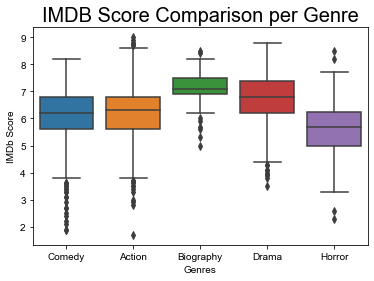

In [18]:
#Genres Comparison
tmp = genres_interested['Genres'].value_counts()
genres_list = tmp[tmp>0].index.tolist()
b=sns.boxplot(y='IMDb Score',x='Genres',data=genres_interested[genres_interested['Genres'].isin(genres_list)])
plt.xticks(rotation=0, size=10)
sns.set(rc={'figure.figsize':(26,10)})
plt.title("IMDB Score Comparison per Genre", size=20)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Project_Group_1/IMDB_Score_Comparison_Genres.png")
#b.set_xlabel(fontsize=25)
#b.set_ylabel(fontsize=25)

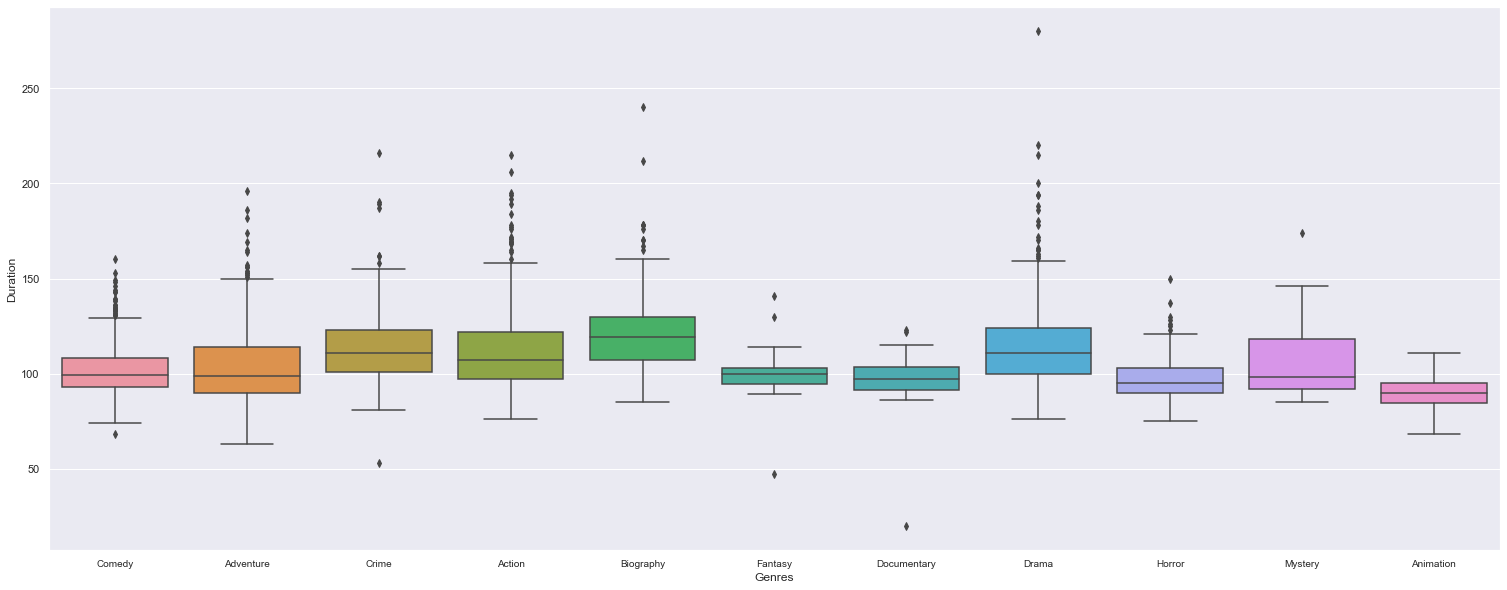

In [22]:
#Duration Comparison

tmp = movie['Genres'].value_counts()
genres_list = tmp[tmp>10].index.tolist()
b=sns.boxplot(y='Duration',x='Genres',data=movie[movie['Genres'].isin(genres_list)])
plt.xticks(rotation=0, size=10)
sns.set(rc={'figure.figsize':(26,10)})
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Project_Group_1/IMDB_Duration_Comparison_Genres.png")

In [ ]:
# Check whether there is any significant difference between the means of three language groups
# Extract individual groups
group1 = genres_interested[genres_interested["Genres"] == "Comedy"]["IMDb Score"]
group2 = genres_interested[genres_interested["Genres"] == "Action"]["IMDb Score"]
group3 = genres_interested[genres_interested["Genres"] == "Biography"]["IMDb Score"]
group4 = genres_interested[genres_interested["Genres"] == "Drama"]["IMDb Score"]
group5 = genres_interested[genres_interested["Genres"] == "Horror"]["IMDb Score"]

In [ ]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

In [ ]:
#We have statistically significant evidence at α=0.05 to show that there is a difference in mean IMDB Score among the 3 different languages.    

In [ ]:
# However, data seems skewed so decided to run Kruskal Wallis test to see if there is any difference in distribution
# Kruskal-Wallis H-test
# Source:https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

# compare samples
stat, p = kruskal(group1, group2, group3, group4, group5)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (Do not reject H0)')
else:
    print('Different distributions (reject H0)')

In [ ]:
#Reject the null hypothesis and conclude that not all the group medians are equal
#A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.